# This notebook shows the TFModiscco experiments.
#### It uses the synthetic sequences file generated via FLY_KC_EFS notebook. 
#### It consists of:
* Calculating contribution scores on synthetic sequences.
* Performing TFModisco on contribution scores.
* Plotting identified patterns.
* Saving trimmed patterns as txt file to be later used for motif analysis.
#### Result files are saved to ./data/tfmodisco folder
#### Figures are saved to ./figures/tfmodisco folder

### General imports


In [55]:
import sys  
import os
import pickle
import utils
import numpy as np
import scipy
import tensorflow as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("default")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Loading DeepFlyBrain data to be used for the initialization of shap.DeepExplainer


In [2]:
print('Loading data...')
f = open('./data/deepflybrain/DeepFlyBrain_nonAugmented_data.pkl', "rb")
nonAugmented_data_dict = pickle.load(f)
f.close()

Loading data...


### Loading the model and initializing shap.DeepExplainer


In [3]:
print('Loading model...')
import shap
tf.disable_eager_execution()
rn=np.random.choice(nonAugmented_data_dict["train_data"].shape[0], 250, replace=False)
model_dict = {}
exp_dict = {} 

name = "DeepFlyBrain"
model_json_file = "models/deepflybrain/model.json"
model_hdf5_file = "models/deepflybrain/model_epoch_83.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), nonAugmented_data_dict["train_data"][rn])

Loading model...


### Loading the generated sequences via in silico evolution


In [4]:
import pickle
f = open("data/deepflybrain/FLY_KC_EFS_6000_withmut.pkl", "rb")
evolved_seq_6000_dict = pickle.load(f)
f.close()

### Calculating nucleotide contribution scores

In [5]:
# def my_print(text):
#     sys.stdout.write(str(text))
#     sys.stdout.flush()

# for n_mut in [1]:
#     my_print("n_mut: " + str(n_mut) + "\n")
#     regions = np.copy(evolved_seq_6000_dict['X'])

#     for id_ in range(len((regions))):
#         for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:n_mut]):
#             regions[id_][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')

#     topic_for_tfmodisco = np.array([35])-1

#     shap_dict = {}
#     tasks = []
#     for topic__ in topic_for_tfmodisco:
#         my_print("Topic_" + str(topic__ + 1) + "\n")
#         task = "Topic_" + str(topic__ + 1)
#         tasks.append(task)
#         shap_dict[task] = {}
#         for i in range(len(regions)):
#             if i % 50 == 0:
#                 my_print(str(i) + "_")
#             shap_values_, indexes_ = exp_dict["DeepFlyBrain"].shap_values(
#                 regions[i:i + 1],
#                 output_rank_order=str(topic__),
#                 ranked_outputs=1,
#                 check_additivity=False)
#             shap_dict[task][i] = [shap_values_]

#     from collections import OrderedDict
#     task_to_scores = OrderedDict()
#     task_to_hyp_scores = OrderedDict()
    
#     for task in tasks:
#         task_to_scores[task] = [ (shap_dict[task][ids_][0][0]*(regions[ids_])).squeeze() for ids_ in shap_dict[task]]
#         task_to_hyp_scores[task] = [shap_dict[task][ids_][0][0].squeeze() for ids_ in shap_dict[task]]
#     onehot_data = regions

#     print(task_to_hyp_scores[tasks[0]][0].shape)
#     print(onehot_data[0].shape)
#     print(task_to_scores[tasks[0]][0].shape)

#     f = open("data/tfmodisco/KCEFS_M"+str(n_mut)+"_topic35_shapvalues.pkl", "wb")
#     pickle.dump(tasks, f)
#     pickle.dump(task_to_scores, f)
#     pickle.dump(task_to_hyp_scores, f)
#     pickle.dump(onehot_data, f)
#     f.close()

### Importing TFModisco package

In [6]:
from __future__ import print_function, division
%matplotlib inline
try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import numpy as np
import modisco
import sys
import os
import pickle

TF-MoDISco is using the TensorFlow backend.


### Loading the contribution scores calculated above

In [7]:
tasks = {}
task_to_scores = {}
task_to_hyp_scores = {}
onehot_data = {}
for i in [1]:
    f = open("data/tfmodisco/KCEFS_M"+str(i)+"_topic35_shapvalues.pkl", "rb")
    tasks[i] = pickle.load(f)
    task_to_scores[i] = pickle.load(f)
    task_to_hyp_scores[i] = pickle.load(f)
    onehot_data[i] = pickle.load(f)
    f.close()

### Visualizing the contribution scores

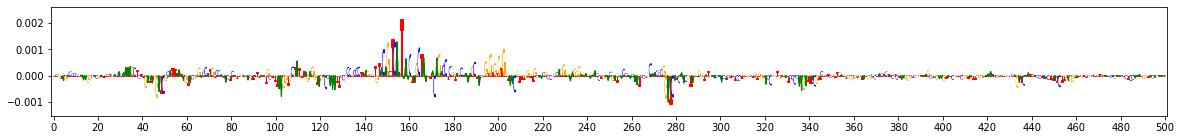

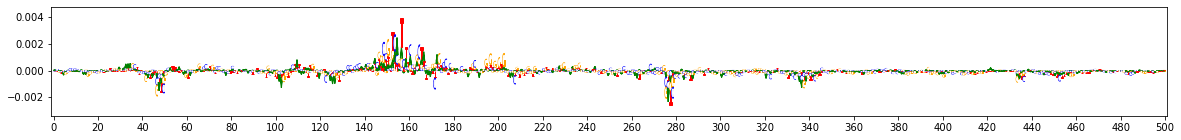

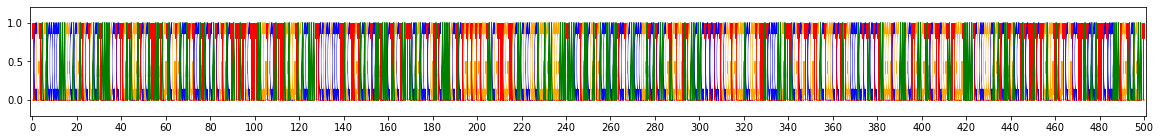

In [8]:
import modisco.visualization
from modisco.visualization import viz_sequence

n_mut = 1
viz_sequence.plot_weights(task_to_scores[n_mut]['Topic_35'][0], subticks_frequency=20)
viz_sequence.plot_weights(task_to_hyp_scores[n_mut]['Topic_35'][0], subticks_frequency=20)
viz_sequence.plot_weights(onehot_data[n_mut][0], subticks_frequency=20)

### Importing TFModisco package

In [9]:
import h5py
import numpy as np
%matplotlib inline
import modisco
import modisco.util
from importlib import reload

### Running TFModisco

In [10]:
# tfmodisco_results = {}
# for n_mut in [1]:
#     null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)
#     tfmodisco_results[n_mut] = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
#                         sliding_window_size=15,
#                         flank_size=5,
#                         target_seqlet_fdr=0.15,
#                         seqlets_to_patterns_factory=
#                          modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
#                             trim_to_window_size=15,
#                             initial_flank_to_add=5,
#                             final_flank_to_add=5,
#                             final_min_cluster_size=60,
#                             n_cores=16)
#                     )(
#                      task_names=tasks[n_mut],
#                      contrib_scores=task_to_scores[n_mut],
#                      hypothetical_contribs=task_to_hyp_scores[n_mut],
#                      one_hot=onehot_data[n_mut],
#                      null_per_pos_scores=null_per_pos_scores)
#     grp = h5py.File("data/tfmodisco/KCEFS_M"+str(n_mut)+"_results.hdf5", "w")
#     tfmodisco_results[n_mut].save_hdf5(grp)
#     grp.close()

### Plotting TFModisco patterns

Metaclusters heatmap
metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 1003
Topic 35 actual importance scores:


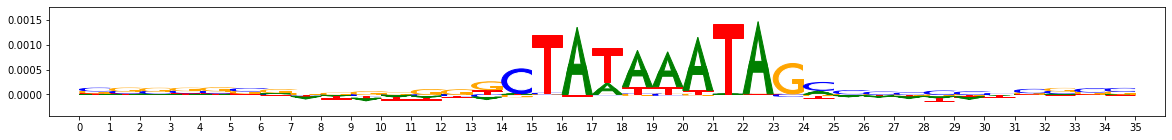

metacluster_0 pattern_1
total seqlets: 767
Topic 35 actual importance scores:


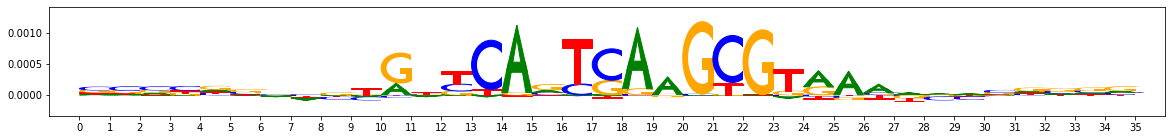

metacluster_0 pattern_2
total seqlets: 417
Topic 35 actual importance scores:


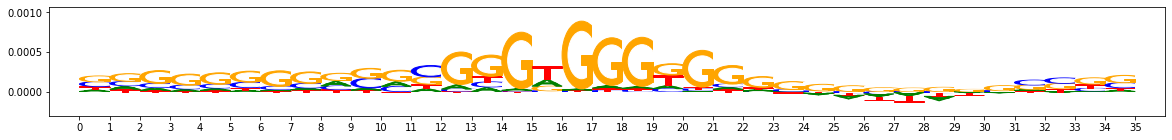

metacluster_0 pattern_3
total seqlets: 388
Topic 35 actual importance scores:


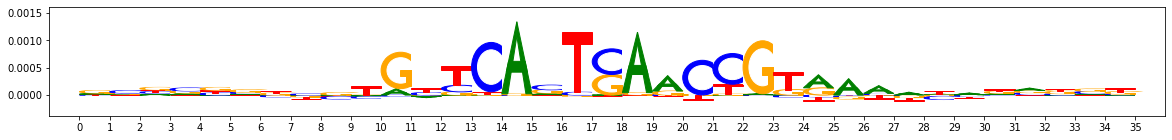

metacluster_0 pattern_4
total seqlets: 379
Topic 35 actual importance scores:


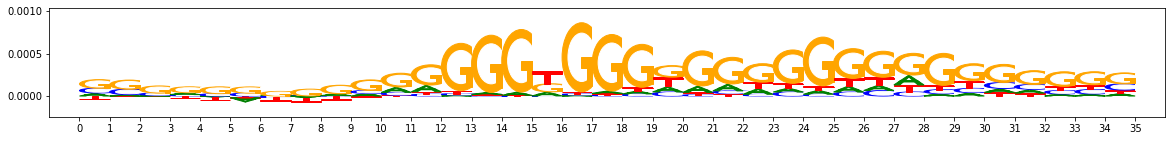

metacluster_0 pattern_5
total seqlets: 375
Topic 35 actual importance scores:


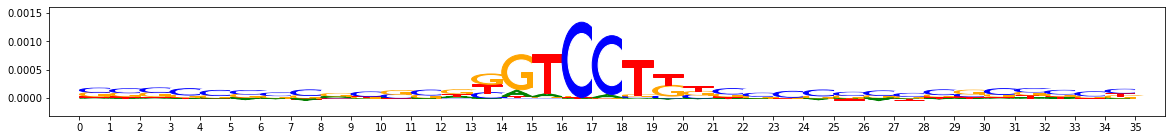

metacluster_0 pattern_6
total seqlets: 359
Topic 35 actual importance scores:


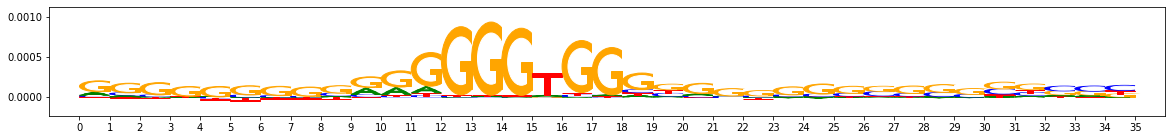

metacluster_0 pattern_7
total seqlets: 287
Topic 35 actual importance scores:


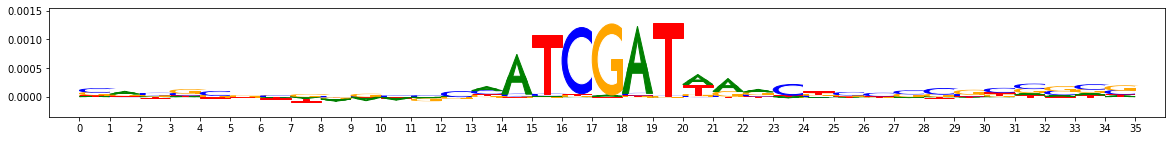

metacluster_0 pattern_8
total seqlets: 276
Topic 35 actual importance scores:


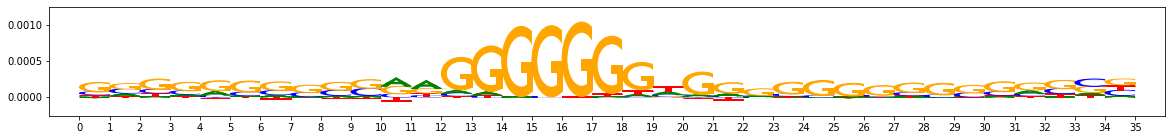

metacluster_0 pattern_9
total seqlets: 104
Topic 35 actual importance scores:


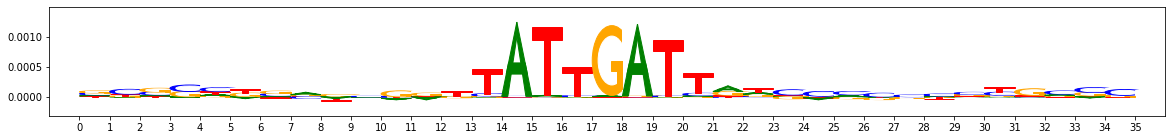

metacluster_0 pattern_10
total seqlets: 90
Topic 35 actual importance scores:


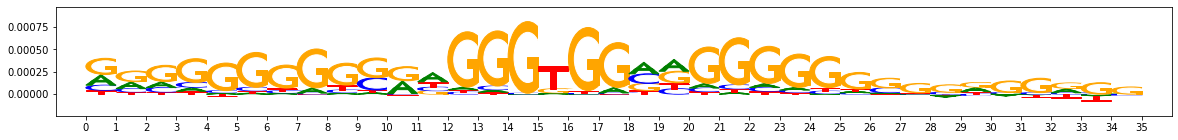

metacluster_0 pattern_11
total seqlets: 86
Topic 35 actual importance scores:


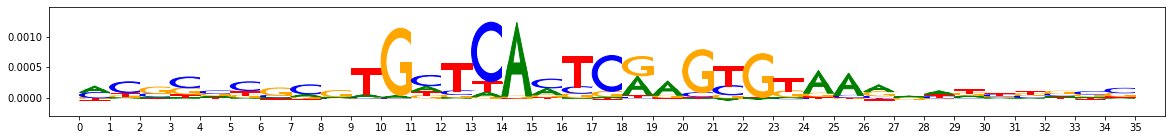

metacluster_0 pattern_12
total seqlets: 66
Topic 35 actual importance scores:


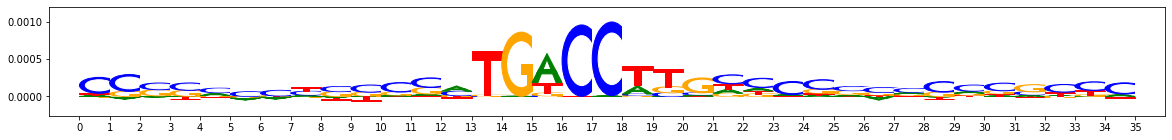

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 720
Topic 35 actual importance scores:


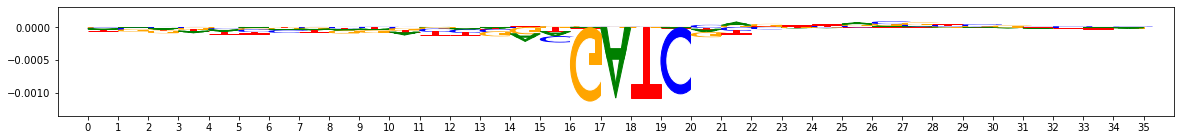

metacluster_1 pattern_1
total seqlets: 472
Topic 35 actual importance scores:


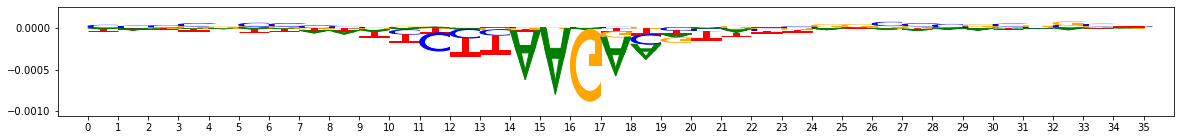

metacluster_1 pattern_2
total seqlets: 364
Topic 35 actual importance scores:


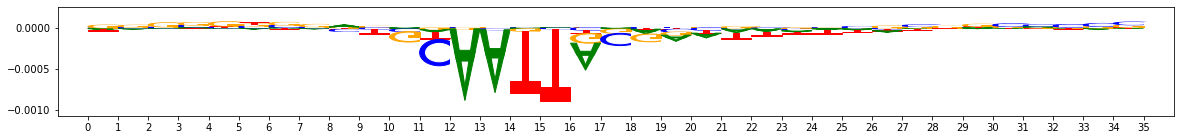

metacluster_1 pattern_3
total seqlets: 185
Topic 35 actual importance scores:


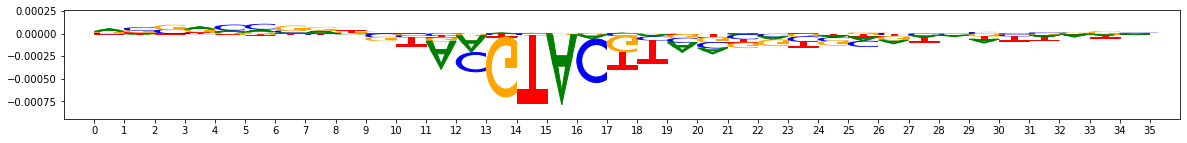

metacluster_1 pattern_4
total seqlets: 185
Topic 35 actual importance scores:


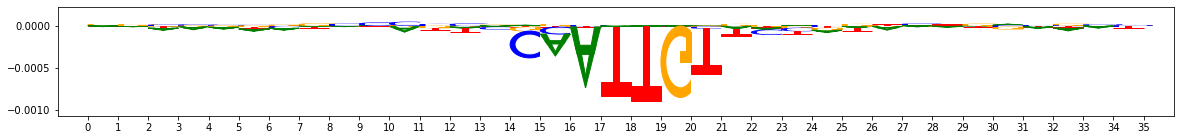

metacluster_1 pattern_5
total seqlets: 171
Topic 35 actual importance scores:


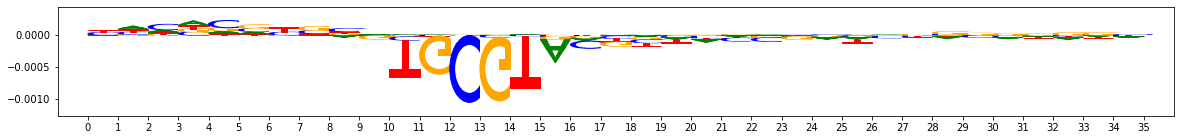

metacluster_1 pattern_6
total seqlets: 144
Topic 35 actual importance scores:


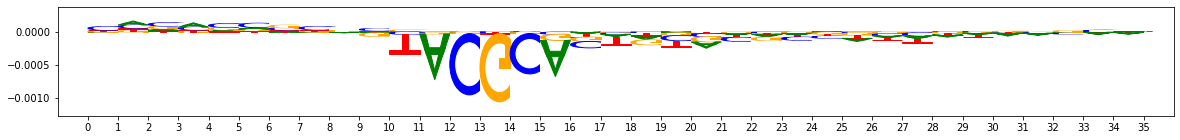

metacluster_1 pattern_7
total seqlets: 103
Topic 35 actual importance scores:


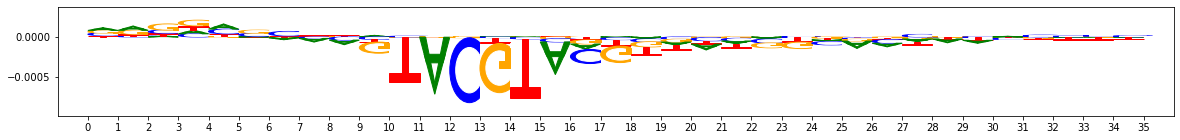

metacluster_1 pattern_8
total seqlets: 89
Topic 35 actual importance scores:


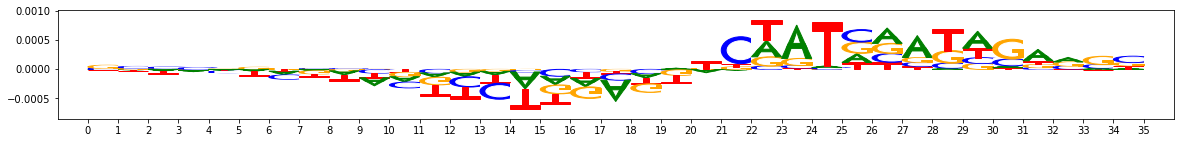

metacluster_1 pattern_9
total seqlets: 75
Topic 35 actual importance scores:


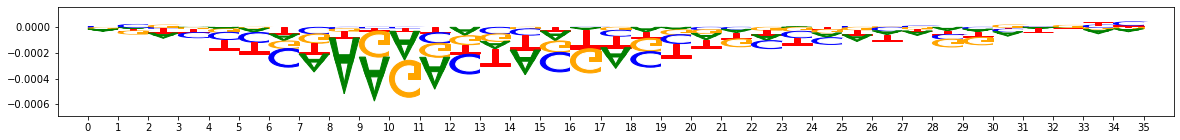

metacluster_1 pattern_10
total seqlets: 60
Topic 35 actual importance scores:


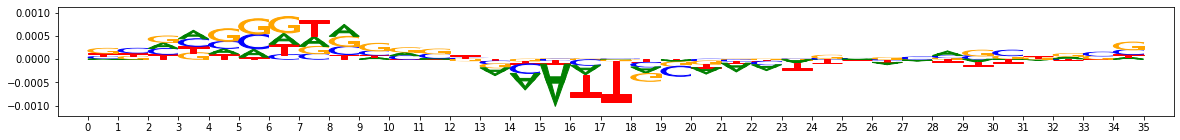

In [11]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

n_mut = 1
hdf5_results = h5py.File("data/tfmodisco/KCEFS_M1_results.hdf5","r")

print("Metaclusters heatmap")
#import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
#sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.mean(onehot_data[n_mut], axis=(0,1))

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Topic 35 actual importance scores:")
        viz_sequence.plot_weights(pattern["Topic_35_contrib_scores"]["fwd"])        
hdf5_results.close()

### Saving TFModisco patterns as text to be later used by ClusterBuster

In [12]:
def get_ic_trimming_indices(ppm, background, threshold, pseudocount=0.001):
    """Return tuple of indices to trim to if ppm is trimmed by info content.
    The ppm will be trimmed from the left and from the right until a position
     that meets the information content specified by threshold is found. A
     base of 2 is used for the infromation content.
    Arguments:
        threshold: the minimum information content.
        remaining arguments same as for compute_per_position_ic
    Returns:
        (start_idx, end_idx). start_idx is inclusive, end_idx is exclusive.
    """
    per_position_ic = compute_per_position_ic(
                       ppm=ppm, background=background, pseudocount=pseudocount)
    passing_positions = np.where(per_position_ic >= threshold)
    return (passing_positions[0][0], passing_positions[0][-1]+1)

def compute_per_position_ic(ppm, background, pseudocount):
    """Compute information content at each position of ppm.
    Arguments:
        ppm: should have dimensions of length x alphabet. Entries along the
            alphabet axis should sum to 1.
        background: the background base frequencies
        pseudocount: pseudocount to be added to the probabilities of the ppm
            to prevent overflow/underflow.
    Returns:
        total information content at each positon of the ppm.
    """
    assert len(ppm.shape)==2
    assert ppm.shape[1]==len(background),\
            "Make sure the letter axis is the second axis"
    assert (np.max(np.abs(np.sum(ppm, axis=1)-1.0)) < 1e-7),(
             "Probabilities don't sum to 1 along axis 1 in "
             +str(ppm)+"\n"+str(np.sum(ppm, axis=1)))
    alphabet_len = len(background)
    ic = ((np.log((ppm+pseudocount)/(1 + pseudocount*alphabet_len))/np.log(2))
          *ppm - (np.log(background)*background/np.log(2))[None,:])
    return np.sum(ic,axis=1)

import h5py
n_mut = 1
hdf5_results = h5py.File("data/tfmodisco/KCEFS_M1_results.hdf5","r")

metacluster_names = [x.decode("utf-8") for x in list(hdf5_results["metaclustering_results"]["all_metacluster_names"][:])]

motif_dict = {}
with open("data/tfmodisco/selected_patterns.txt", 'w') as fw_pattern:
    for metacluster_name in metacluster_names:
        motif_dict[metacluster_name] = {}
        metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"][metacluster_name])
        pattern_names = [x.decode("utf-8") for x in list(metacluster_grp["seqlets_to_patterns_result"]["patterns"]["all_pattern_names"][:])]

        background = np.mean(onehot_data[n_mut], axis=(0,1))
        for pattern_name in pattern_names:
            pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
            pattern_array = np.array(pattern["sequence"]["fwd"])
            start, end = get_ic_trimming_indices(pattern_array, background=np.mean(onehot_data[n_mut], axis=(0,1)), threshold=0.1)
            print(f'{metacluster_name}_{pattern_name}',file=fw_pattern)
            with open(f'data/tfmodisco/motifs/KCEFS_M{n_mut}_{metacluster_name}_{pattern_name}.cb', 'w') as fw:
                print(f'>{metacluster_name}_{pattern_name}',file=fw)
                for i in pattern_array[start:end,:]*100:
                    print(*i,file=fw)
hdf5_results.close()

### Plotting TFModisco trimmed patterns

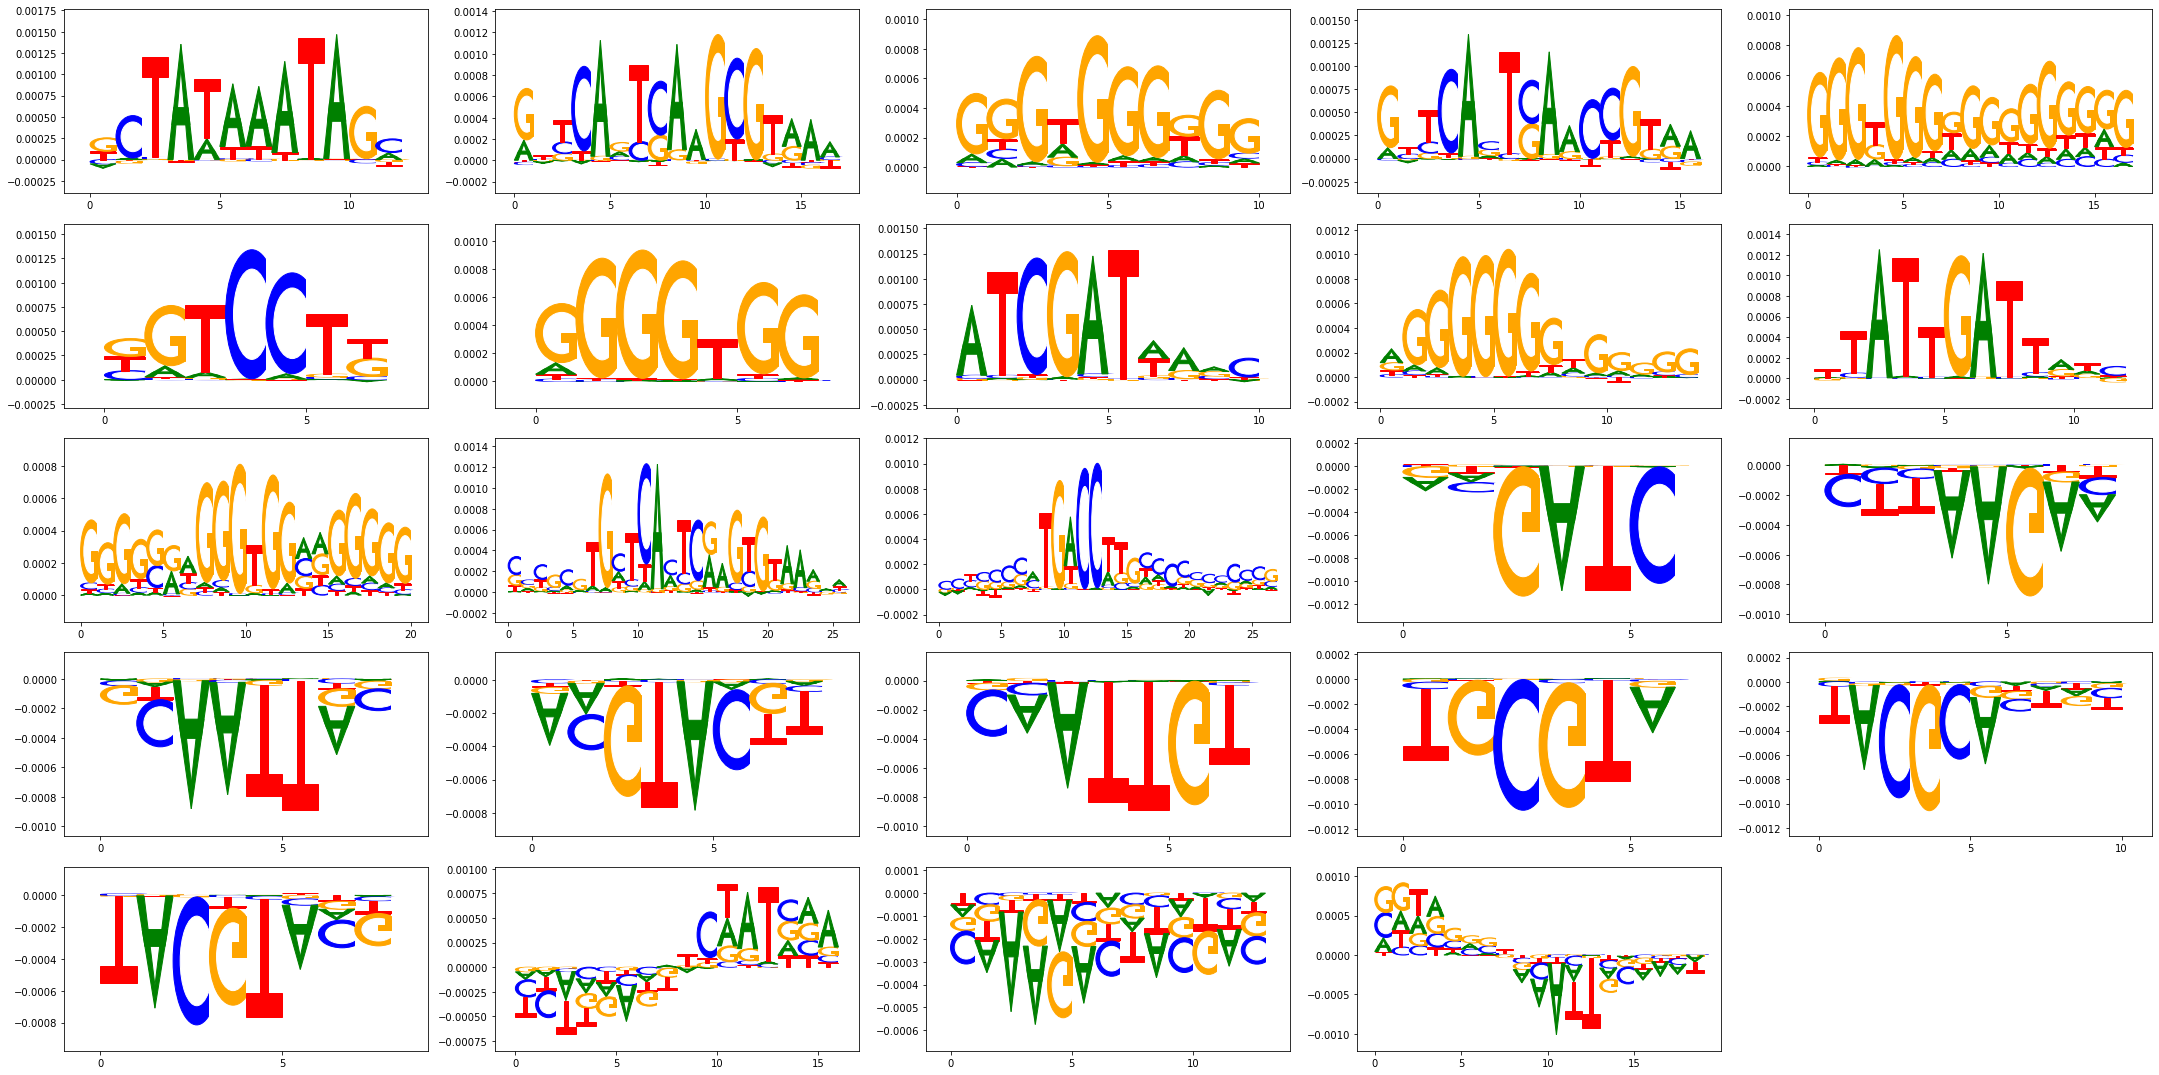

In [14]:
fig = plt.figure(figsize=(30,15))

hdf5_results = h5py.File("data/tfmodisco/KCEFS_M1_results.hdf5","r")

metacluster_names = [x.decode("utf-8") for x in list(hdf5_results["metaclustering_results"]["all_metacluster_names"][:])]

motif_dict = {}
track_no = 1
for metacluster_name in metacluster_names:
    
    motif_dict[metacluster_name] = {}
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"][metacluster_name])
    pattern_names = [x.decode("utf-8") for x in list(metacluster_grp["seqlets_to_patterns_result"]["patterns"]["all_pattern_names"][:])]

    background = np.mean(onehot_data[n_mut], axis=(0,1))
    for pattern_name in pattern_names:
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        pattern_array = np.array(pattern["sequence"]["fwd"])
        pattern_cont_score = np.array(pattern["Topic_35_contrib_scores"]["fwd"])
        start, end = get_ic_trimming_indices(pattern_array, background=np.mean(onehot_data[n_mut], axis=(0,1)), threshold=0.1)
        pattern_array[start:end,:]*100
        
        _, ax1 = utils.plot_weights(pattern_cont_score[start:end,:],
                              fig, 5, 5, track_no,
                              title="", subticks_frequency=5, ylab="")
        track_no += 1

fig.tight_layout()
plt.savefig("figures/tfmodisco/M1_patterns.pdf",transparent=True)

hdf5_results.close()